# An√°lise de dados Mercado Marassanduba

![Foto do Mercado](Fotos%20Mercado.jpg)

<h1><b><u>Contexto da empresa</u></b></h1>


A empresa atua no segmento de com√©rcio varejista de mercadorias em geral, com √™nfase nos setores de **alimentos**, **produtos de limpeza**, e  **higiene pessoal**.


A base de dados utilizada para an√°lise √© oriunda de um levantamento real, realizado ao longo de um per√≠odo de seis meses, contemplando vari√°veis como data da compra, categorias e quantidades de produtos adquiridos, valor total das transa√ß√µes, bem como indicadores relacionados as vendas.

O objetivo central deste estudo consiste em desenvolver an√°lises que subsidiem a **otimiza√ß√£o da gest√£o de estoques**, o **monitoramento do fluxo de vendas** e a **identifica√ß√£o de padr√µes comportamentais de consumos**. Tais an√°lises s√£o essenciais para a redu√ß√£o dos custos operacionais, a mitiga√ß√£o de rupturas no abastecimento e, consequentemente, para o aprimoramento da efici√™ncia dos processos log√≠sticos e comerciais da organiza√ß√£o, promovendo maior precis√£o na reposi√ß√£o de produtos e, por consequ√™ncia, elevando o n√≠vel de satisfa√ß√£o dos clientes.



In [107]:
# Importa a biblioteca pandas, que √© amplamente utilizada para an√°lise e manipula√ß√£o de dados em Python.
# Com o pandas, voc√™ pode trabalhar com tabelas (DataFrames), ler e escrever arquivos (como Excel, CSV), filtrar dados, agrupar, entre outros.
import pandas as pd 

# Importa a biblioteca matplotlib.pyplot, que √© usada para criar gr√°ficos e visualiza√ß√µes simples (como gr√°ficos de barras, linhas, pizza, etc.).
# O alias "plt" √© uma abrevia√ß√£o comum para facilitar o uso dos comandos da biblioteca.
import matplotlib.pyplot as plt

# Importa a biblioteca seaborn, que √© baseada no matplotlib, mas fornece gr√°ficos com visual mais bonito e op√ß√µes mais sofisticadas por padr√£o.
# Muito usada para gr√°ficos estat√≠sticos (como gr√°ficos de dispers√£o, histogramas, mapas de calor, etc.).
import seaborn as sns

# Importa o m√≥dulo locale, que serve para configurar padr√µes de localidade, como formata√ß√£o de moeda, datas, separadores decimais etc.
# Isso √© √∫til, por exemplo, para exibir valores no formato brasileiro (R$ 1.000,00) em vez do americano ($1,000.00).
import locale


In [108]:
#Configura√ß√µes 
locale.setlocale(locale.LC_TIME, 'pt_BR.utf8') #Formatar para o portugues brasileiro
#usado ainda mais em rela√ß√£o as datas da analise sazonal 

'pt_BR.utf8'

In [ ]:
#  Dicion√°rio de Dados

Este dicion√°rio descreve as principais colunas utilizadas na base de dados do projeto de vendas, incluindo tipo de dado e uma breve descri√ß√£o para cada campo.


| *Nome da Coluna*   | *Tipo*           | *Descri√ß√£o*                                                                 |
|----------------------|--------------------|-------------------------------------------------------------------------------|
| produto            | Texto (string)     | Nome do produto vendido                                                       |
| categoria_produto  | Texto (string)     | Categoria geral do produto (ex: alimentos, eletr√¥nicos, etc.)                 |
| quantidade         | Inteiro (int)      | Quantidade de unidades vendidas por transa√ß√£o                                |
| preco_unitario     | Decimal (float)    | Pre√ßo unit√°rio do produto (em reais)                                          |
| total_venda        | Decimal (float)    | Valor total da venda, calculado como quantidade √ó pre√ßo_unit√°rio           |

---

<h1><b><u>Explorando a Base de Dados</u></b></h1>

In [10]:

# Carregando o arquivo aonde esta nossa base de dados 
df = pd.read_excel(r"C:\Users\andre\OneDrive\√Årea de Trabalho\ADW\Downloads\Dados_Vendas.xlsx")

# Exibe as primeiras linhas, como padr√£o as 5 primeiras.
df.head()

Data Categorias        Produtos  Quantidades  Pre√ßo unit√°rio  \
0 2025-04-01    Higiene  Condicionador             4           22.90   
1 2025-04-01    Limpeza   Sab√£o liquido            4           14.00   
2 2025-04-01    Limpeza      Detergente            8            2.75   
3 2025-04-01    Higiene        Sabonete            1            3.50   
4 2025-04-01  Alimentos          A√ß√∫car           10            8.00   

   Total de vendas   
0              91.6  
1              56.0  
2              22.0  
3               3.5  
4              80.0

### Observa-se que a base de dados √© composta por seis colunas, a saber:

- **Data:** indica o dia e o m√™s e o ano em que a compra foi efetuada.
- **Categorias:** indica a classifica√ß√£o do produto adquirido;
- **Quantidade:** refere-se ao n√∫mero de unidades do produto comprado;
- **Pre√ßo Unit√°rio:** corresponde ao valor monet√°rio de cada unidade do produto;
- **Total de Vendas:** corresponde ao montante total obtido na transa√ß√£o, calculado pela multiplica√ß√£o da quantidade pelo pre√ßo unit√°rio;


Essa estrutura√ß√£o dos dados permite uma an√°lise segmentada do comportamento das vendas ao longo do tempo.


#### Resumo Estat√≠stico

Com a base de dados estruturada, √© poss√≠vel aprofundar a an√°lise de cada vari√°vel e obter insights mais precisos e fundamentados. O uso do resumo estat√≠stico torna-se essencial nesse processo, pois permite identificar medidas centrais, como a m√©dia, al√©m de variabilidade, como o desvio padr√£o. Esses indicadores oferecem uma vis√£o clara do comportamento dos dados e contribuem para a tomada de decis√µes mais embasadas.
Ent√£o abaixo est√° o resumo de linhas e colunas totais da base de dados. 

In [11]:
#Analise Descritiva para analisar a integridades dos dados 
#Tamanho da Tabela (Linhas e Colunas)
df.shape

(2929, 6)

- **2929 linhas**: corresponde ao **n√∫mero total de registros** no seu conjunto de dados.  
- **6 colunas**: corresponde ao **n√∫mero total de colunas** (atributos) dispon√≠veis para cada registro.


In [12]:
# aponta os Tipos de Dados
df.dtypes 

Data                datetime64[ns]
Categorias                  object
Produtos                    object
Quantidades                  int64
Pre√ßo unit√°rio             float64
Total de vendas            float64
dtype: object

**Tipos de Dados no DataFrame**

**1. datetime64[ns]**  
Representa datas e hor√°rios. Usado para an√°lises temporais, como tend√™ncias e sazonalidades.

**2. object**  
Texto ou r√≥tulos categ√≥ricos, como nomes, categorias ou formas de pagamento.

**3. int64**  
N√∫meros inteiros, usados para contagens, c√≥digos ou quantidades.

**4. float64**  
N√∫meros decimais, geralmente aplicados a valores monet√°rios ou medidas cont√≠nuas.


In [13]:
# verifica se tem Campos Nullos ou seja campos vazios 
df.isnull().sum()

Data                0
Categorias          0
Produtos            0
Quantidades         0
Pre√ßo unit√°rio      0
Total de vendas     0
dtype: int64

**Aus√™ncia de Dados Nulos**

Podemos observar que o DataFrame n√£o cont√©m valores nulos, o que contribui para uma an√°lise mais clara e confi√°vel. A aus√™ncia de dados ausentes tamb√©m reduz a necessidade de etapas complexas de limpeza.


In [ ]:
df.describe(include='number')



| Estat√≠stica | O que significa                                                                 | Quantidades | Pre√ßo Unit√°rio | Total de Vendas |
|-------------|----------------------------------------------------------------------------------|-------------|----------------|-----------------|
| count       | Total de registros v√°lidos (sem valores nulos)                                  | 2929        | 2929           | 2929            |
| mean        | M√©dia dos valores                                                               | 4.80        | 7.93           | 38.94           |
| std         | Desvio padr√£o (grau de varia√ß√£o dos valores em torno da m√©dia)                 | 2.47        | 4.98           | 33.11           |
| min         | Menor valor registrado                                                          | 1.00        | 2.30           | 2.50            |
| 25%         | Primeiro quartil (25% dos valores est√£o abaixo desse ponto)                     | 3.00        | 4.90           | 15.00           |
| 50%         | Mediana (valor central dos dados; 50% acima e 50% abaixo)                       | 5.00        | 6.00           | 28.00           |
| 75%         | Terceiro quartil (75% dos valores est√£o abaixo desse ponto)                     | 6.00        | 10.00          | 52.11           |
| max         | Maior valor registrado                                                          | 22.00       | 26.44          | 239.36          | R$239,36 |


#### Poss√≠veis Considera√ß√µes

#### 1. Dados completos
- Todas as colunas possuem *2.929 registros v√°lidos*.
- *N√£o h√° valores nulos*, o que evita a necessidade de limpeza adicional.
---
#### 2. Distribui√ß√£o equilibrada
- A m√©dia e a mediana est√£o pr√≥ximas em todas as colunas, o que indica uma *distribui√ß√£o relativamente sim√©trica*.
  - Exemplo: Quantidades ‚Üí m√©dia = 4,80 e mediana = 5,00
---
#### 3. Alta varia√ß√£o
- O *desvio padr√£o √© relativamente alto* em rela√ß√£o √† m√©dia, especialmente para:
  - *Pre√ßo Unit√°rio*: m√©dia = 7,93 | desvio = 4,98
  - *Total de Vendas*: m√©dia = 38,94 | desvio = 33,11
- Isso sugere que existem *valores muito diferentes entre si*, o que pode indicar:
  - Produtos com pre√ßos muito variados
  - Vendas de volumes diferentes (compras pequenas vs grandes)

---



In [ ]:
#Exibe as informa√ß√µes da base 
df.info()


| # | Coluna           | Registros n√£o nulos | Tipo de dado (dtype) | Explica√ß√£o                                                  |
|---|------------------|---------------------|-----------------------|-------------------------------------------------------------|
| 0 | Data             | 2932                | object                | Representa a data da venda (formato texto) |
| 1 | Categoria        | 2932                | object                | Categoria do produto  (formato texto) |      |
| 2 | Produto          | 2932                | object                | Nome do produto vendido  (formato texto) |                           |
| 3 | Quantidade       | 2932                | int64                 | Quantidade vendida (n√∫mero inteiro)                         |
| 4 | Pre√ßo Unit√°rio   | 2932                | float64               | Valor unit√°rio do produto (com casas decimais)              |
| 5 | Total de vendas  | 2932                | float64               | Valor total da venda (quantidade √ó pre√ßo unit√°rio)          |

---
#### Leitura

- object: tipo gen√©rico para textos (strings ou datas que ainda n√£o foram convertidas)
- int64: n√∫meros inteiros
- float64: n√∫meros com ponto flutuante (decimais)
---
#### Uso de mem√≥ria

- Uso total de mem√≥ria: *137.6 KB*d√™ncias mensais).



<h1><b><u>Estudo Explorat√≥rio Inicial </u></b></h1>

Conhecendo a Base de Dados Antes de iniciarmos an√°lises mais aprofundadas, √© fundamental entender a base de dados e sua estrutura. Isso garante maior clareza sobre os dados dispon√≠veis e orienta as pr√≥ximas etapas da explora√ß√£o.

A seguir, veremos as categorias de produtos dispon√≠veis, o total de vendas e o faturamento por categoria, oferecendo uma vis√£o geral do desempenho de cada segmento.



In [109]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())  # para confirmar os nomes das colunas da base de dados 


# Converte a coluna 'Quantidade' para valores num√©ricos. 
# Caso tenha valores inv√°lidos (ex: texto), ser√£o convertidos para NaN (ignorado no c√°lculo).
df['Quantidades'] = pd.to_numeric(df['Quantidades'], errors='coerce')

# Converte a coluna 'Total de vendas' para valores num√©ricos, ignorando erros da mesma forma.
df['Total de vendas'] = pd.to_numeric(df['Total de vendas'], errors='coerce')

# Calcula a soma total dos valores da coluna 'Quantidade', ignorando valores NaN.
quantidade_total = df['Quantidades'].sum()

# Calcula a soma total dos valores da coluna 'Total de vendas', ignorando valores NaN.
valor_total = df['Total de vendas'].sum()

# Exibe a quantidade total de itens vendidos no console.
print(f"Quantidade total de itens vendidos: {quantidade_total}")

# Exibe o valor total arrecadado em vendas no formato de moeda brasileira (R$), com duas casas decimais e separador de milhares.
print(f"Valor total arrecadado em vendas: R$ {valor_total:,.2f}")



['Data', 'Categorias', 'Produtos', 'Quantidades', 'Pre√ßo unit√°rio', 'Total de vendas', 'Mes']
Quantidade total de itens vendidos: 14073
Valor total arrecadado em vendas: R$ 114,052.46


#### A Quantidade totais de itens √© 14073
#### O Valor total arrecadado em vendas: R$ 114,052.46

Com base no c√°lculo do total de vendas, podemos iniciar uma s√©rie de an√°lises importantes para entender melhor o desempenho do supermercado e identificar oportunidades de melhoria. 

A partir desse resultado, podemos investigar quest√µes como:

- **O comportamento das vendas ao longo do tempo:**  
  Analisar se o total de vendas est√° crescendo, est√°vel ou em queda, para avaliar a sa√∫de financeira do neg√≥cio e identificar tend√™ncias.

- **Varia√ß√£o sazonal das vendas:**  
  Estudar em quais per√≠odos (dias, semanas ou meses) as vendas apresentam aumentos ou quedas, identificando padr√µes sazonais e per√≠odos cr√≠ticos.

- **Impacto de datas comemorativas:**  
  Avaliar como eventos especiais como Natal, P√°scoa, Black Friday e outras promo√ß√µes afetam o total de vendas, para potencializar estrat√©gias de marketing e estoque.


- **Produtos que mais contribuem**
  Identificar os principais produtos respons√°veis pela maior parte do faturamento, para focar em campanhas, controle de estoque e negocia√ß√µes com fornecedores.

  - **Categorias que mais contribuem**
  Identicar a categoria mais vendida e se ela tem rela√ß√£o com pre√ßo ou data.

Essas an√°lises s√£o essenciais para embasar decis√µes estrat√©gicas, otimizar opera√ß√µes e aumentar a rentabilidade do supermercado.



O gr√°fico de barras abaixo apresenta o total de vendas por categoria de produto, permitindo identificar quais segmentos tiveram maior volume de comercializa√ß√£o .


C:\Users\andre\AppData\Local\Temp\ipykernel_42448\2665928123.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\andre\AppData\Local\Temp\ipykernel_42448\2665928123.py:54: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\andre\AppData\Local\Temp\ipykernel_42448\2665928123.py:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


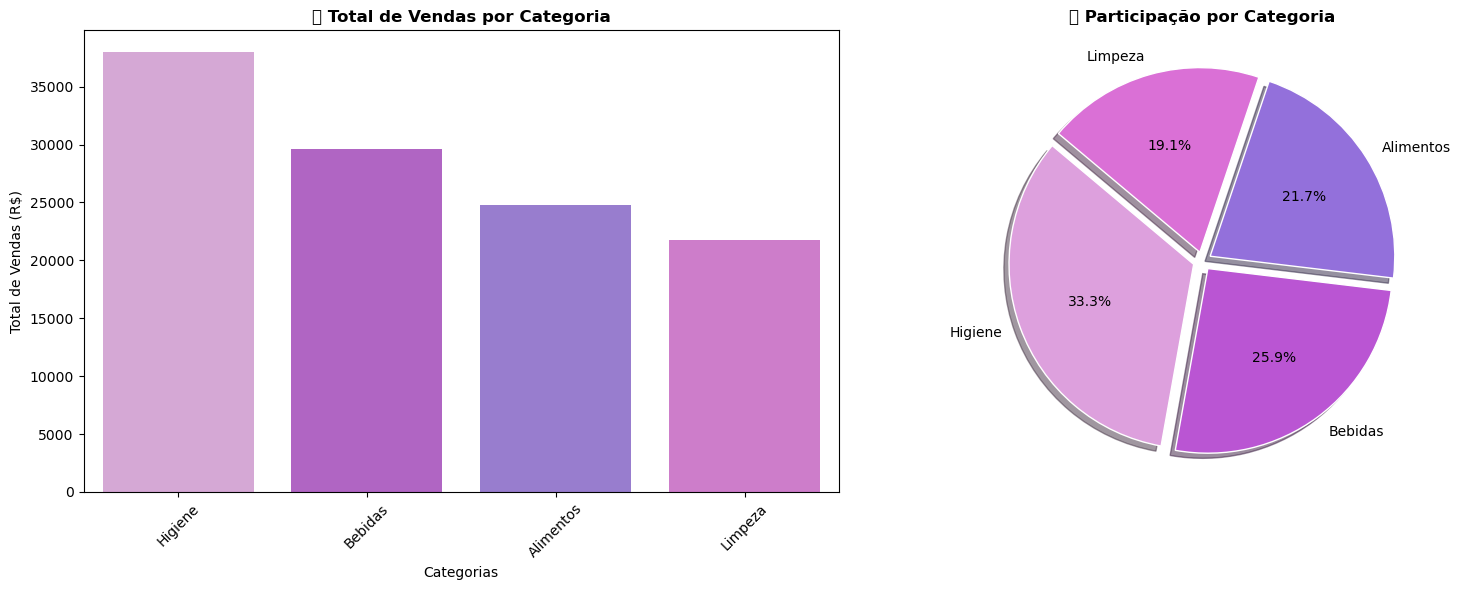

In [111]:

# Padroniza√ß√£o e convers√µes
df.columns = df.columns.str.strip()
df["Categorias"] = df["Categorias"].str.title()
df['Quantidades'] = pd.to_numeric(df['Quantidades'], errors='coerce')
df['Total de vendas'] = pd.to_numeric(df['Total de vendas'], errors='coerce')

# Agrupamento por categoria (total e m√©dia)
agrupamento_categoria = df.groupby("Categorias").agg({
    "Quantidades": ["sum", "mean"],
    "Total de vendas": ["sum", "mean"]
}).round(2)
agrupamento_categoria.columns = ['Qtd_Total', 'Qtd_M√©dia', 'Venda_Total', 'Venda_M√©dia']
agrupamento_categoria = agrupamento_categoria.reset_index()
agrupamento_categoria = agrupamento_categoria.sort_values(by='Venda_Total', ascending=False)

# Dados para o gr√°fico de pizza
vendas_categoria = df.groupby("Categorias")["Total de vendas"].sum().sort_values(ascending=False)

# Paleta personalizada
cores_personalizadas = ["#DDA0DD", "#BA55D3", "#9370DB", "#DA70D6", "#C71585", "#8A2BE2", "#FF69B4"]
while len(cores_personalizadas) < len(vendas_categoria):
    cores_personalizadas += cores_personalizadas
explode = [0.05] * len(vendas_categoria)

# Criar figura com dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gr√°fico de barras
sns.barplot(
    data=agrupamento_categoria,
    x='Categorias',
    y='Venda_Total',
    palette=cores_personalizadas[:len(agrupamento_categoria)],
    ax=axes[0]
)
axes[0].set_title("üíú Total de Vendas por Categoria", fontsize=12, weight='bold')
axes[0].set_xlabel("Categorias")
axes[0].set_ylabel("Total de Vendas (R$)")
axes[0].tick_params(axis='x', rotation=45)

# Gr√°fico de pizza
axes[1].pie(
    vendas_categoria,
    labels=vendas_categoria.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    colors=cores_personalizadas[:len(vendas_categoria)],
    explode=explode,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("üìä Participa√ß√£o por Categoria", fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


### Total de Vendas por Categoria
Aqui apresentamos diferentes tipo e vizualiza√ß√£o, em porcentual e de forma quantitativa, para dar fluxo e entendermos de fato qual categoria tem mais impacto no valor total de vendas e o motivo.

#### Vis√£o Geral
O gr√°fico apresenta a soma do *total de vendas (em reais)* por categoria de produto. O eixo Y representa o valor arrecadado, e o eixo X representa as categorias.

---
#### Categorias analisadas:
- Higiene
- Bebidas
- Alimentos
- Limpeza
---
### Principais Observa√ß√µes:

1. *Categoria com maior faturamento:*
   - *Higiene* √© a l√≠der de vendas, ultrapassando os R$ 35.000.
   - Isso indica forte demanda ou maior valor unit√°rio m√©dio por produto.

2. *Outras categorias:*
   - *Bebidas* ocupa a segunda posi√ß√£o, com valor pr√≥ximo a R$ 28.000.
   - *Alimentos* aparece em terceiro, com vendas ao redor de R$ 22.000.
   - *Limpeza* √© a categoria com menor total de vendas (pr√≥xima de R$ 20.000).

3. *Diferen√ßa entre categorias:*
   - A diferen√ßa entre *Higiene* e *Limpeza* √© significativa (~R$ 15.000), o que pode indicar:
     - Estrat√©gias promocionais distintas
     - Frequ√™ncia ou volume de compras diferentes
     - Produtos de maior ticket m√©dio em Higiene



##### Para aprofundar a compreens√£o sobre o desempenho comercial, foi realizada uma an√°lise dos 10 produtos com maior volume de vendas. O objetivo √© identificar quais itens tiveram maior impacto financeiro, destacando aqueles com maior aceita√ß√£o pelo p√∫blico.


C:\Users\andre\AppData\Local\Temp\ipykernel_42448\1713243084.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_valor, x="Total de vendas", y="Produtos", palette=cores_lilas_rosa)


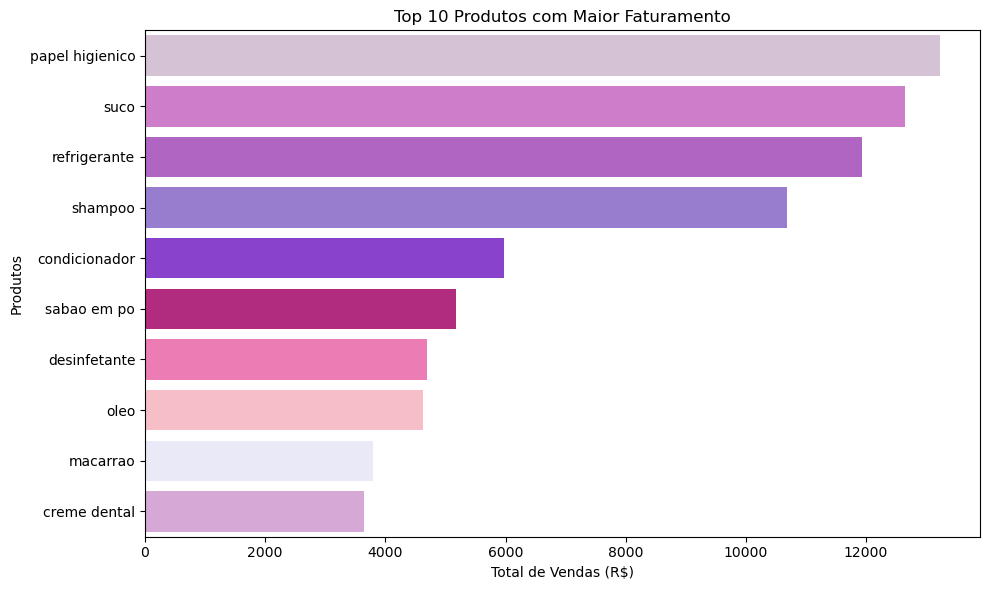

In [36]:
# Agrupa os dados por produto e soma o total de vendas, ordenando do maior para o menor e selecionando os 10 melhores
top_valor = df.groupby("Produtos")["Total de vendas"].sum().sort_values(ascending=False).head(10).reset_index()

# Define uma paleta personalizada em tons de lil√°s e rosa para o gr√°fico
cores_lilas_rosa = ["#D8BFD8", "#DA70D6", "#BA55D3", "#9370DB", "#8A2BE2", "#C71585", "#FF69B4", "#FFB6C1", "#E6E6FA", "#DDA0DD"]

# Configura o tamanho da figura do gr√°fico
plt.figure(figsize=(10, 6))

# Cria um gr√°fico de barras horizontal usando a paleta lil√°s e rosa definida
sns.barplot(data=top_valor, x="Total de vendas", y="Produtos", palette=cores_lilas_rosa)

# Define o t√≠tulo do gr√°fico
plt.title("Top 10 Produtos com Maior Faturamento")

# Define o r√≥tulo do eixo X
plt.xlabel("Total de Vendas (R$)")

# Define o r√≥tulo do eixo Y
plt.ylabel("Produtos")

# Ajusta o layout para evitar sobreposi√ß√£o ou corte dos elementos
plt.tight_layout()

# Exibe o gr√°fico
plt.show()


### Top 10 Produtos com Maior Faturamento melhor vizualiza√ß√£o para leitura 

|  Posi√ß√£o | Produto         | Total de Vendas (R$) | An√°lise R√°pida                                   |
|-----------|------------------|-----------------------|--------------------------------------------------|
| 1¬∫        | Papel higi√™nico   | ~13.000               | Produto essencial e com alta frequ√™ncia de compra |
| 2¬∫        | Suco              | ~12.000               | Provavelmente vendido em grande volume           |
| 3¬∫        | Refrigerante      | ~11.000               | Alta demanda e margem atrativa                   |
| 4¬∫        | Shampoo           | ~9.500                | Produto de higiene pessoal com boa rotatividade  |
| 5¬∫        | Condicionador     | ~8.000                | Costuma ser comprado junto com shampoo           |
| 6¬∫        | Sab√£o em p√≥       | ~7.000                | Produto de limpeza recorrente                    |
| 7¬∫        | Desinfetante      | ~6.000                | Essencial para higiene, principalmente no p√≥s-pandemia |
| 8¬∫        | √ìleo              | ~5.000                | Produto de cozinha b√°sico, vendido em volume     |
| 9¬∫        | Macarr√£o          | ~4.500                | Alta rotatividade e consumo frequente            |
| 10¬∫       | Creme dental      | ~4.000                | Baixo valor unit√°rio, mas essencial    ¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†|

---

#### An√°lise das 10 Principais Categorias mais vendidas 

O gr√°fico  apresenta as 10 categorias com maior volume ou valor de vendas, permitindo uma vis√£o detalhada do desempenho de cada segmento. A an√°lise destaca as categorias que mais contribuem para o faturamento total, identifica poss√≠veis oportunidades de crescimento e aponta varia√ß√µes significativas entre os grupos.
Esse levantamento por categoria ajuda a compreender quais setores s√£o mais estrat√©gicos para o neg√≥cio, auxiliando na tomada de decis√µes relacionadas a estoque, marketing e pol√≠ticas comerciais.



#### Vis√£o Geral

O gr√°fico apresentado demonstra os dez produtos com maior faturamento. O eixo vertical (eixo Y) representa os produtos, enquanto o eixo horizontal (eixo X) indica o total de vendas em reais (R$).

*Observa√ß√£o:* A imagem analisada n√£o apresenta o item "esponja" como mencionado anteriormente, e sim os produtos "macarr√£o" e "creme dental" como os √∫ltimos da lista em faturamento.

#### Discuss√£o dos Resultados mais afundo 

O produto com maior arrecada√ß√£o no per√≠odo √© o *papel higi√™nico*. Esse resultado pode ser justificado por se tratar de um item essencial, de uso di√°rio, com reposi√ß√£o frequente por parte dos consumidores.
Produtos como shampoo, condicionador,   sab√£o em p√≥, desinfetante e creme dental aparecem com destaque, evidenciando a import√¢ncia de itens relacionados √† higiene pessoal e dom√©stica nas decis√µes de compra.

####  Consumo de bebidas

*Suco* e *refrigerante* ocupam, respectivamente, o segundo e o terceiro lugar em faturamento. Esse dado pode refletir aspectos como o clima local, a cultura alimentar da regi√£o e a prefer√™ncia por bebidas prontas para consumo.

#### Alimentos b√°sicos

Produtos como *√≥leo* e *macarr√£o* tamb√©m se destacam, demonstrando a presen√ßa significativa de alimentos de preparo r√°pido e cotidiano na cesta de compras do consumidor.

#### Considera√ß√µes Finais

A an√°lise evidencia que os consumidores priorizam a aquisi√ß√£o de *produtos essenciais, especialmente aqueles ligados √† **higiene pessoal, **limpeza dom√©stica, **bebidas* e *alimenta√ß√£o b√°sica*.

Os dados obtidos podem auxiliar em decis√µes estrat√©gicas de:
- Reposi√ß√£o de estoque;
- Planejamento de promo√ß√µes;
- Organiza√ß√£o do layout dos produtos no ponto de venda.

Essas a√ß√µes visam otimizar as vendas com base nos h√°bitos e nas necessidades recorrentes dos¬†consumidores.


#### Ap√≥s analisar os 10 produtos com maior volume de vendas, direcionamos a aten√ß√£o aos 10 produtos com menor desempenho, buscando entender seu impacto no faturamento e identificar oportunidades para otimizar estoque, marketing e mix de produtos.


Duplicados no agrupamento: 0


C:\Users\andre\AppData\Local\Temp\ipykernel_42448\7213802.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_menos, x="Total de vendas", y="Produtos", palette=cores_lilas_rosa)


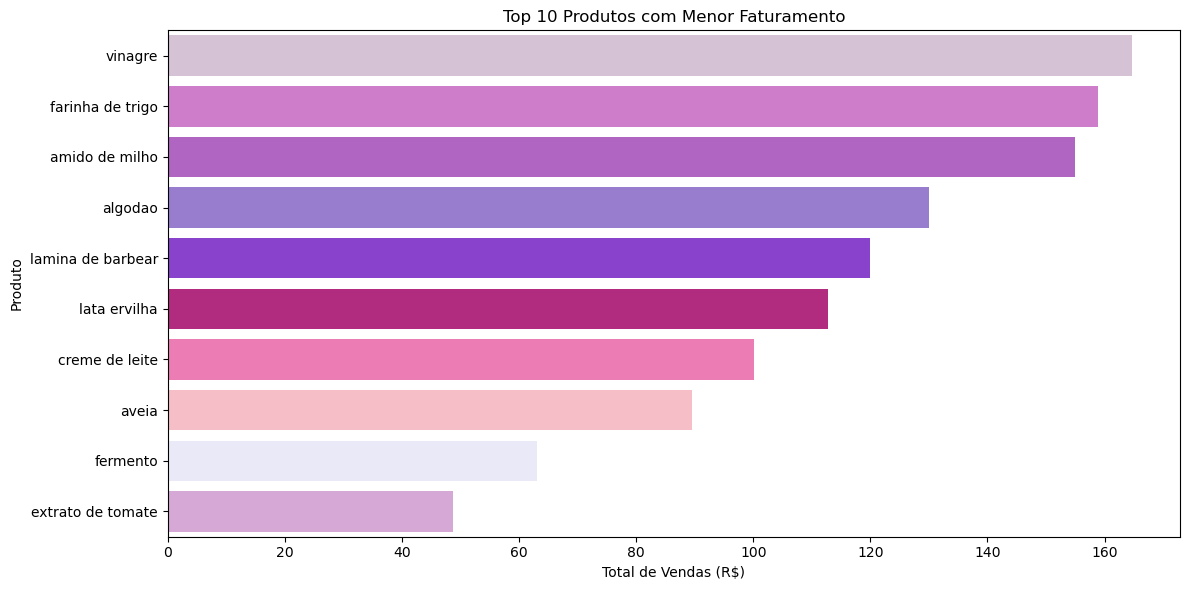

In [112]:

# Fun√ß√£o para limpar e normalizar nomes de produtos
def normalize_text(text):
    text = text.strip().lower()  # Remove espa√ßos e converte para min√∫sculas
    # Remove acentua√ß√£o e caracteres especiais, mantendo s√≥ ASCII
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    text = text.replace('.', '').replace(',', '')  # Remove pontos e v√≠rgulas
    return text

# Aplica a normaliza√ß√£o na coluna "Produtos" do DataFrame
df["Produtos"] = df["Produtos"].apply(normalize_text)

# Agrupa os dados por produto e soma o total de vendas para cada um, ordenando do maior para o menor valor
top_valores = df.groupby("Produtos")["Total de vendas"].sum().sort_values(ascending=False).reset_index()

# Verifica se h√° nomes duplicados no agrupamento (deve ser zero ap√≥s normaliza√ß√£o)
print("Duplicados no agrupamento:", top_valores["Produtos"].duplicated().sum())

# Seleciona os 10 produtos com menor faturamento (√∫ltimos da lista ordenada)
top_menos = top_valores.tail(10)

# Paleta personalizada em tons de lil√°s e rosa
cores_lilas_rosa = ["#D8BFD8", "#DA70D6", "#BA55D3", "#9370DB", "#8A2BE2", "#C71585", "#FF69B4", "#FFB6C1", "#E6E6FA", "#DDA0DD"]

# Configura o tamanho da figura para o gr√°fico
plt.figure(figsize=(12, 6))

# Cria o gr√°fico de barras horizontais para os 10 produtos menos lucrativos usando a paleta lil√°s e rosa
sns.barplot(data=top_menos, x="Total de vendas", y="Produtos", palette=cores_lilas_rosa)

# Define o t√≠tulo do gr√°fico
plt.title("Top 10 Produtos com Menor Faturamento")

# Define o r√≥tulo do eixo X
plt.xlabel("Total de Vendas (R$)")

# Define o r√≥tulo do eixo Y
plt.ylabel("Produto")

# Ajusta o layout para evitar cortes nos elementos do gr√°fico
plt.tight_layout()

# Exibe o gr√°fico
plt.show()


### Top 10 Produtos com Maior Faturamento melhor vizualiza√ß√£o para leitura 
|  Posi√ß√£o | Produto           | Total de Vendas (R\$) |  An√°lise R√°pida                                        |
| ---------: | ----------------- | --------------------: | -------------------------------------------------------- |
|         1¬∫ | Extrato de tomate |                  \~40 | Produto com menor sa√≠da; poss√≠vel excesso de estoque.    |
|         2¬∫ | Fermento          |                  \~70 | Baixa demanda; pode ser sazonal ou mal posicionado.      |
|         3¬∫ | Aveia             |                  \~85 | Nichado; p√∫blico restrito ou pouca visibilidade.         |
|         4¬∫ | Creme de leite    |                  \~95 | Potencial subutilizado em campanhas promocionais.        |
|         5¬∫ | Lata ervilha      |                 \~110 | Pouco atrativo; considerar embalagem ou oferta.          |
|         6¬∫ | L√¢mina de barbear |                 \~120 | Categoria de higiene com baixa rotatividade.             |
|         7¬∫ | Algod√£o           |                 \~130 | Provavelmente compra espor√°dica, giro lento.             |
|         8¬∫ | Amido de milho    |                 \~145 | Essencial, mas com pouca procura; falta de promo√ß√£o?     |
|         9¬∫ | Farinha de trigo  |                 \~155 | Produto b√°sico, mas concorr√™ncia pode afetar.            |
|        10¬∫ | Vinagre           |                 \~165 | Entre os menores, mas ainda com bom desempenho¬†relativo.¬†|


#### An√°lise das 10 Principais Categorias menos vendidas 

O gr√°fico a seguir mostra os *10 produtos com os menores valores totais de vendas (em R\$)*. A an√°lise considera a soma total das vendas por produto, do menor para o maior entre os menos vendidos.

#### Vis√£o Geral

Estes produtos apresentam os menores desempenhos em vendas no per√≠odo analisado, o que pode indicar baixa demanda, estoque excessivo ou necessidade de a√ß√µes promocionais espec√≠ficas.


#### Discuss√£o dos Resultados mais afundo 

* *Extrato de tomate* tem o menor faturamento (\~R\$ 40), sendo um alerta para revisar sua estrat√©gia de precifica√ß√£o, visibilidade ou necessidade real de estoque.
* *Produtos de higiene pessoal* como l√¢mina de barbear e algod√£o tamb√©m aparecem entre os 10 menores, o que pode indicar sazonalidade ou baixo giro.
* *Produtos aliment√≠cios b√°sicos* como farinha de trigo e amido de milho est√£o pr√≥ximos ao topo da lista (ou seja, com faturamento mais alto entre os menos vendidos), mostrando que ainda t√™m algum apelo, embora abaixo do esperado.

---

##### Considera√ß√µes Finais

Esses produtos podem ser alvos de:

* *Promo√ß√µes* para aumentar a sa√≠da de estoque.
* *Reposicionamento* nas prateleiras .
* *Revis√£o de mix de produtos* se a baixa venda for consistente.

---

#### Com as categorias j√° analisadas anteriormente, agora podemos aprofundar a avalia√ß√£o, identificando como pre√ßo, quantidade vendida e total de vendas se relacionam dentro dessas categorias, para entender melhor os fatores que influenciam seu impacto no faturamento do mercado.

  

C:\Users\andre\AppData\Local\Temp\ipykernel_42448\335347197.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


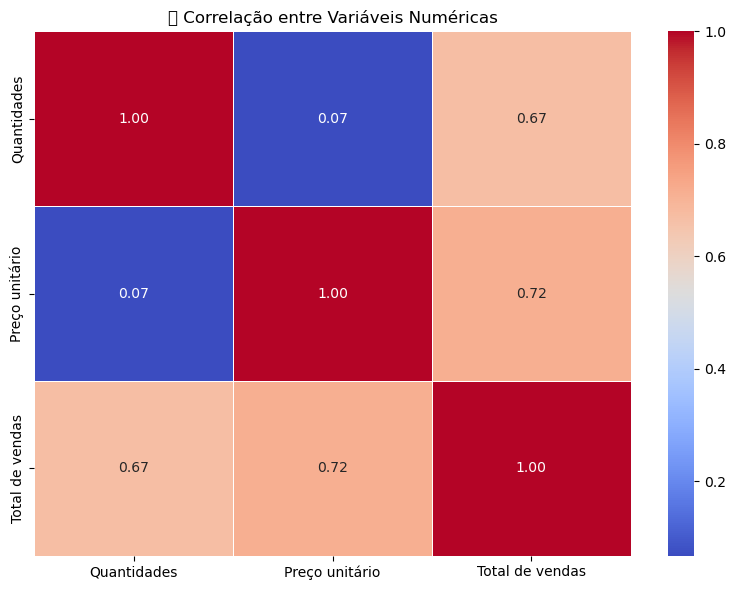

In [127]:
# Selecionar apenas colunas num√©ricas para correla√ß√£o
dados_numericos = df[["Quantidades", "Pre√ßo unit√°rio", "Total de vendas"]]

# Calcular matriz de correla√ß√£o
correlacao = dados_numericos.corr()

# Exibir heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("üîç Correla√ß√£o entre Vari√°veis Num√©ricas")
plt.tight_layout()
plt.show()

### An√°lise de Correla√ß√£o entre Pre√ßo Unit√°rio,  Quantidade vendida, e Total de Vendas

A matriz de correla√ß√£o √© uma ferramenta estat√≠stica utilizada para avaliar a for√ßa e a dire√ß√£o da rela√ß√£o linear entre vari√°veis num√©ricas. Os coeficientes de correla√ß√£o variam de -1 a 1:

- *+1*: Correla√ß√£o positiva perfeita ‚Äî ambas as vari√°veis aumentam juntas.
- *0*: Aus√™ncia de correla√ß√£o linear.
- *-1*: Correla√ß√£o negativa perfeita ‚Äî uma vari√°vel aumenta enquanto a outra diminui.

#### Tabela de Coeficientes de Correla√ß√£o

| Vari√°veis Comparadas                  | Coeficiente de Correla√ß√£o | Interpreta√ß√£o                                                  |
|--------------------------------------|----------------------------|----------------------------------------------------------------|
| Quantidade √ó Quantidade              | 1,00                       | Correla√ß√£o perfeita (autocorrela√ß√£o)                           |
| Quantidade √ó Pre√ßo Unit√°rio          | 0,07                       | Correla√ß√£o muito fraca ou estatisticamente irrelevante         |
| Quantidade √ó Total de Vendas         | 0,67                       | Correla√ß√£o moderada a forte, indicando associa√ß√£o positiva     |

#### Interpreta√ß√£o dos Resultados

- A correla√ß√£o entre *quantidade vendida* e *total de vendas* √© de 0,67, indicando uma rela√ß√£o positiva moderada a forte. Isso sugere que, √† medida que se vende uma maior quantidade de produtos, o valor total arrecadado tende a aumentar proporcionalmente.
  
- J√° a correla√ß√£o entre *quantidade vendida* e *pre√ßo unit√°rio* √© de apenas 0,07, o que indica aus√™ncia de associa√ß√£o linear relevante entre essas vari√°veis. Em outras palavras, a quantidade vendida n√£o est√° diretamente relacionada ao pre√ßo unit√°rio dos produtos.

- A autocorrela√ß√£o, como esperado, √© igual a 1,00, pois representa a correla√ß√£o de uma vari√°vel consigo mesma.

#### Considera√ß√µes Finais

A an√°lise de correla√ß√£o revela que o *volume de vendas* (quantidade) exerce influ√™ncia significativa sobre o faturamento total, mas **n√£o apresenta rela√ß√£o linear relevante com o pre√ßo unit√°rio**. Isso pode indicar que, nesta base de dados, o desempenho em vendas est√° mais associado √† demanda do produto do que √† sua precifica√ß√£o.

##### Dando continuidade √† an√°lise geral de correla√ß√£o entre pre√ßo unit√°rio, quantidade vendida e total de vendas, focamos agora especificamente na rela√ß√£o entre quantidade vendida e pre√ßo unit√°rio. Entender esse v√≠nculo √© essencial para avaliar a sensibilidade do consumidor ao pre√ßo dos produtos e identificar padr√µes de demanda.
##### Essa an√°lise permite verificar se varia√ß√µes no pre√ßo influenciam diretamente o volume de vendas, o que √© fundamental para definir estrat√©gias de precifica√ß√£o, promo√ß√µes e otimiza√ß√£o de estoque, alinhando as a√ß√µes comerciais com o comportamento do mercado.


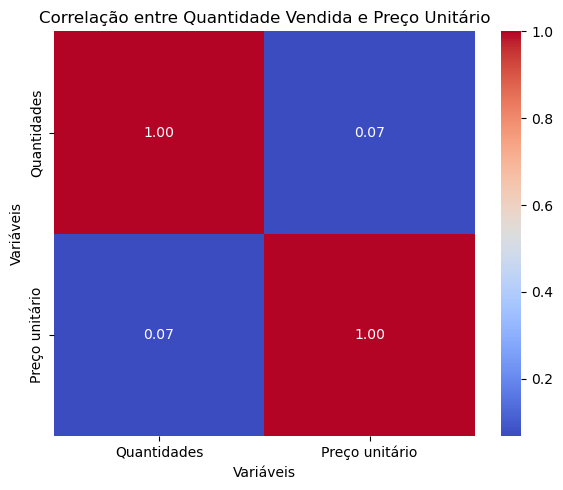

In [54]:

# === 1. CARREGAR OS DADOS ===
df = pd.read_excel(r"C:\Users\andre\OneDrive\√Årea de Trabalho\ADW\Downloads\Dados_Vendas.xlsx")
df.columns = df.columns.str.strip()  # Limpar nomes das colunas

# === 2. SELECIONAR VARI√ÅVEIS PARA CORRELA√á√ÉO ===
dados_correlacao = df[["Quantidades", "Pre√ßo unit√°rio"]]

# === 3. CALCULAR MATRIZ DE CORRELA√á√ÉO ===
matriz_corr = dados_correlacao.corr()

# === 4. PLOTAR HEATMAP COM EIXOS E VALORES ===
plt.figure(figsize=(6, 5))
sns.heatmap(
    matriz_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    xticklabels=["Quantidades", "Pre√ßo unit√°rio"],
    yticklabels=["Quantidades", "Pre√ßo unit√°rio"]
)
plt.title("Correla√ß√£o entre Quantidade Vendida e Pre√ßo Unit√°rio")
plt.xlabel("Vari√°veis")
plt.ylabel("Vari√°veis")
plt.tight_layout()
plt.show()

# === 5. INTERPRETA√á√ÉO DA CORRELA√á√ÉO ===
correlacao = matriz_corr.loc["Quantidades", "Pre√ßo unit√°rio"]

### An√°lise da Rela√ß√£o entre Quantidade Vendida e Pre√ßo Unit√°rio

A partir dos resultados obtidos sobre o total de vendas por categoria, podemos aprofundar nossa an√°lise avaliando se existe uma rela√ß√£o entre o **pre√ßo unit√°rio dos produtos** e a **quantidade vendida**.

A ideia central √© responder √† seguinte pergunta:

> **"Produtos com pre√ßo mais alto tendem a vender em menor quantidade?"**

#### Hip√≥tese
Produtos com valor unit√°rio mais elevado podem ter menor sa√≠da, indicando uma **poss√≠vel rela√ß√£o inversa** entre pre√ßo e quantidade comprada pelos clientes.


## Correla√ß√£o entre Quantidade Vendida e Pre√ßo Unit√°rio

A seguir, apresenta-se a an√°lise da correla√ß√£o entre duas vari√°veis num√©ricas da base de dados: *quantidade de itens vendidos* e *pre√ßo unit√°rio*. A visualiza√ß√£o foi realizada por meio de um heatmap de correla√ß√£o.

### Tabela de Valores de Correla√ß√£o

| Vari√°veis Comparadas                | Coeficiente de Correla√ß√£o | Interpreta√ß√£o                                                  |
|------------------------------------|----------------------------|----------------------------------------------------------------|
| Quantidade √ó Quantidade            | 1,00                       | Correla√ß√£o perfeita (autocorrela√ß√£o)                           |
| Quantidade √ó Pre√ßo Unit√°rio        | 0,07                       | Correla√ß√£o muito fraca ou inexistente                          |
| Pre√ßo Unit√°rio √ó Pre√ßo Unit√°rio    | 1,00                       | Correla√ß√£o perfeita (autocorrela√ß√£o)                           |

### An√°lise das Cores no Heatmap

- Tons mais escuros de vermelho indicam forte correla√ß√£o positiva (pr√≥xima de 1,00), como ocorre nas autocorrela√ß√µes.
- Tons mais claros ou azulados indicam fraca correla√ß√£o, como no caso entre quantidade e pre√ßo unit√°rio.

### Considera√ß√µes Anal√≠ticas

- Observa-se que n√£o h√° correla√ß√£o significativa entre o pre√ßo unit√°rio e a quantidade vendida.
- O coeficiente de 0,07 sugere que as varia√ß√µes de pre√ßo n√£o est√£o diretamente associadas ao volume de vendas.
- Essa aus√™ncia de rela√ß√£o linear pode indicar que outros fatores, al√©m do pre√ßo, influenciam o comportamento de compra observado na base de dados.
- Como esperado, a autocorrela√ß√£o (compara√ß√£o da vari√°vel com ela mesma) apresenta valor igual a 1,00.

Esta an√°lise √© relevante para avaliar se estrat√©gias de precifica√ß√£o impactam diretamente o volume de vendas. No caso desta base, os dados sugerem que **n√£o h√° uma rela√ß√£o estatisticamente relevante entre essas duas vari√°veis.**

- - -



In [128]:
# Remove espa√ßos nos nomes das colunas, se ainda n√£o fez
df.columns = df.columns.str.strip()

# Converte as colunas para num√©rico, se necess√°rio
df['Pre√ßo unit√°rio'] = pd.to_numeric(df['Pre√ßo unit√°rio'], errors='coerce')
df['Quantidades'] = pd.to_numeric(df['Quantidades'], errors='coerce')

# Calcula o coeficiente de correla√ß√£o de Pearson
correlacao = df['Pre√ßo unit√°rio'].corr(df['Quantidades'])

# Exibe o resultado
print(f"Coeficiente de correla√ß√£o: {correlacao:.2f}")


Coeficiente de correla√ß√£o: 0.07



Para quantificar a rela√ß√£o entre o pre√ßo unit√°rio e a quantidade vendida, calculamos o coeficiente de correla√ß√£o de Pearson. Esse coeficiente mede a for√ßa e a dire√ß√£o da associa√ß√£o linear entre as duas vari√°veis, variando entre -1 e 1. Valores pr√≥ximos de 1 indicam correla√ß√£o positiva forte, pr√≥ximos de -1 indicam correla√ß√£o negativa forte, e valores pr√≥ximos de 0 indicam pouca ou nenhuma correla√ß√£o.


<h1><b><u>An√°lises Sazonais</u></b></h1>

#### Com base nas an√°lises de correla√ß√£o entre produtos mais e menos vendidos, total de vendas e categorias, avan√ßamos agora para uma investiga√ß√£o sazonal, a fim de avaliar se as datas exercem influ√™ncia direta sobre o volume de vendas.

Compreender as varia√ß√µes ao longo do tempo √© essencial para identificar padr√µes de comportamento do consumidor, efeitos sazonais e oportunidades ligadas a per√≠odos espec√≠ficos, como feriados, finais de semana ou mudan√ßas de esta√ß√£o. Essa an√°lise permite antecipar demandas e orientar estrat√©gias de estoque, promo√ß√µes e planejamento de vendas de forma mais eficiente.


Meses encontrados: <PeriodArray>
['2025-04', '2024-12', '2025-02', '2025-01', '2025-03', '2024-11']
Length: 6, dtype: period[M]


C:\Users\andre\AppData\Local\Temp\ipykernel_42448\2782798616.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


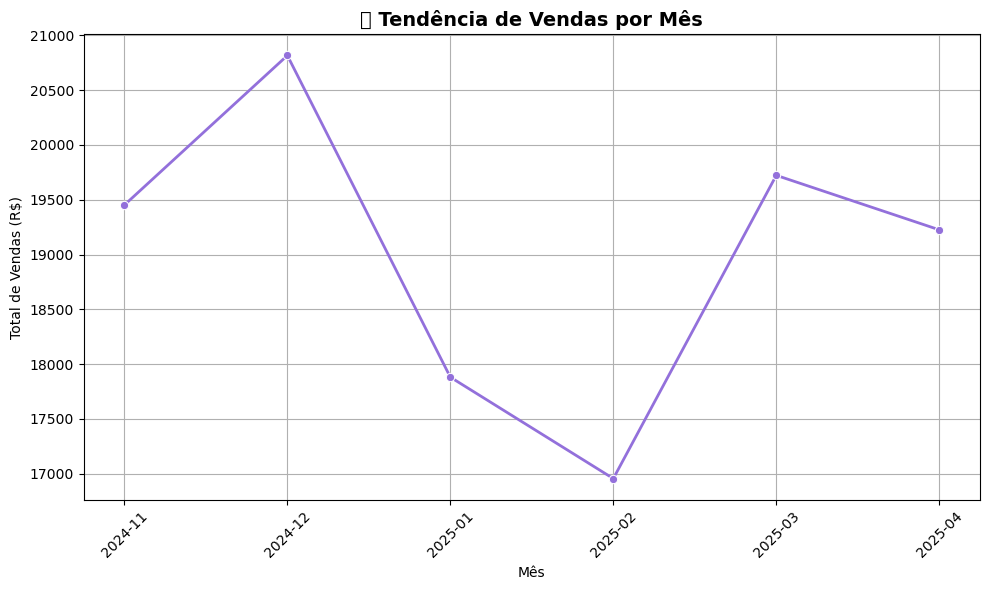

In [60]:

# Limpeza da coluna "Total de vendas"
df["Total de vendas"] = df["Total de vendas"].astype(str)
df["Total de vendas"] = df["Total de vendas"].replace(r"R\$", "", regex=True)
df["Total de vendas"] = df["Total de vendas"].str.replace(",", ".")
df["Total de vendas"] = pd.to_numeric(df["Total de vendas"], errors="coerce")

# Convers√£o da coluna "Data"
df["Data"] = pd.to_datetime(df["Data"], dayfirst=True, errors="coerce")

# Remover linhas com valores ausentes em "Data" ou "Total de vendas"
df = df.dropna(subset=["Data", "Total de vendas"])

# Verifique os meses √∫nicos presentes (para debug)
print("Meses encontrados:", df["Data"].dt.to_period("M").unique())

# Criar coluna "Mes"
df["Mes"] = df["Data"].dt.to_period("M").astype(str)

# Agrupar e calcular varia√ß√£o percentual
vendas_por_mes = df.groupby("Mes")["Total de vendas"].sum().reset_index()
vendas_por_mes["Varia√ß√£o %"] = vendas_por_mes["Total de vendas"].pct_change().fillna(0) * 100

# Gr√°fico
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=vendas_por_mes,
    x="Mes",
    y="Total de vendas",
    marker="o",
    color="#9370DB",
    linewidth=2
)

plt.title("üìà Tend√™ncia de Vendas por M√™s", fontsize=14, weight='bold')
plt.xlabel("M√™s")
plt.ylabel("Total de Vendas (R$)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



| M√™s         |  Vendas (estimadas) |Hip√≥tese para o comportamento |
|----------------|------------------------|----------------------------------|
| *2024-11*    | ~19.500                | In√≠cio de prepara√ß√£o para festas, aumento moderado nas compras. |
| *2024-12*    | ~21.000                | *Alta significativa* por conta das festas de fim de ano (Natal e Ano Novo). Aumento no consumo de alimentos, bebidas e higiene. |
| *2025-01*    | ~18.500                | *Queda p√≥s-festas*: consumidores seguram os gastos ap√≥s o pico de dezembro. |
| *2025-02*    | ~17.000                | *Ponto mais baixo*: despesas com impostos (IPVA, IPTU), material escolar e impacto do Carnaval. |
| *2025-03*    | ~20.000                | *Recupera√ß√£o nas vendas*: volta √†s aulas, promo√ß√µes e normaliza√ß√£o da rotina. |
| *2025-04*    | ~19.000                | Leve queda ap√≥s o pico de mar√ßo, indicando tend√™ncia de estabiliza√ß√£o. |

---


### An√°lise da Tend√™ncia de Vendas por M√™s

O gr√°fico acima apresenta a **evolu√ß√£o do total de vendas mensais (em R$)** no per√≠odo de **novembro de 2024 a abril de 2025**. Abaixo, destacamos os principais pontos observados:

- **Novembro/2024**: O total de vendas inicia em aproximadamente **R$ 19.500**, servindo como uma base est√°vel para o per√≠odo analisado.

- **Dezembro/2024**: Ocorre um **aumento expressivo** nas vendas, atingindo o pico do per√≠odo com um valor pr√≥ximo de **R$ 21.000**. Esse crescimento pode estar relacionado ao movimento sazonal de fim de ano, t√≠pico do com√©rcio varejista.

- **Janeiro/2025**: As vendas caem drasticamente para cerca de **R$ 17.800**, indicando uma poss√≠vel "ressaca" p√≥s-festas ou redu√ß√£o natural no consumo no in√≠cio do ano.

- **Fevereiro/2025**: Registra-se o menor valor do per√≠odo, em torno de **R$ 17.000**, mantendo a tend√™ncia de baixa observada no m√™s anterior.

- **Mar√ßo/2025**: As vendas se recuperam significativamente, alcan√ßando cerca de **R$ 19.300**, quase retornando ao patamar de novembro.

- **Abril/2025**: Observa-se uma leve queda, com o total de vendas fechando o m√™s em aproximadamente **R$ #18.900**.

### Resumo da Varia√ß√£o

- H√° uma alta sazonal clara em **dezembro**.
- Os meses de **janeiro e fevereiro** apresentam queda significativa nas vendas.
- Em **mar√ßo e abril**, nota-se uma recupera√ß√£o parcial do volume de vendas.

Essa an√°lise revela um comportamento t√≠pico de segmentos comerciais influenciados pela sazonalidade: forte alta em dezembro seguida de retra√ß√£o no in√≠cio do ano. A recupera√ß√£o nos meses seguintes pode refletir retomada gradual do consumo ou a√ß√µes aplicadas no per√≠odo.


#### Dando continuidade √†s an√°lises sazonais, avan√ßamos agora para uma visualiza√ß√£o mais detalhada do comportamento das vendas ao longo do tempo, com foco nos dias do ano.

Atrav√©s do heatmap a seguir, √© poss√≠vel observar como o volume de vendas varia diariamente em cada ano analisado. Essa abordagem permite identificar padr√µes de alta e baixa demanda distribu√≠dos no calend√°rio, ajudando a reconhecer sazonalidades espec√≠ficas, como datas comemorativas, ciclos de consumo e poss√≠veis per√≠odos cr√≠ticos de vendas.

**Como interpretar o gr√°fico:**  
- Cada linha representa um ano distinto e cada coluna um dia espec√≠fico do calend√°rio (no formato dia/m√™s).  
- As cores indicam o volume de vendas, onde tons mais claros representam maiores vendas e tons mais escuros, menores vendas.  
- Assim, √°reas claras mostram picos de vendas em dias espec√≠ficos, enquanto √°reas escuras indicam per√≠odos de menor movimento.


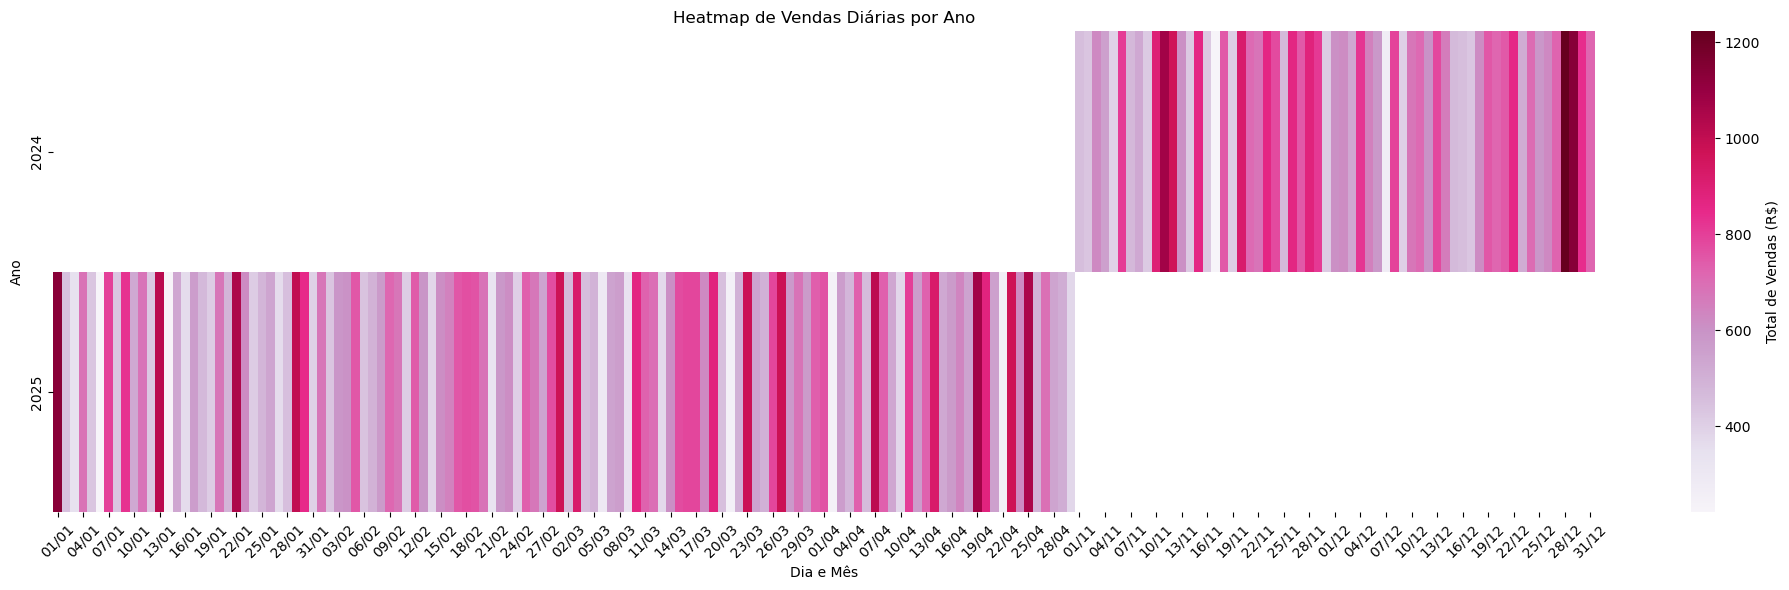

In [114]:
# Converte a coluna 'Data' para o formato datetime, tratando poss√≠veis erros
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

# Remove linhas onde a data n√£o p√¥de ser convertida (NaT)
df = df.dropna(subset=['Data'])

# Garante que a coluna 'Total de vendas' est√° em formato num√©rico
df['Total de vendas'] = pd.to_numeric(df['Total de vendas'], errors='coerce')

# Agrupa os dados por dia, somando o total de vendas para cada data
vendas_diarias = df.groupby('Data')['Total de vendas'].sum().reset_index()

# Cria colunas auxiliares para an√°lise
vendas_diarias['Ano'] = vendas_diarias['Data'].dt.year                 # Ano da venda
vendas_diarias['Dia_Mes'] = vendas_diarias['Data'].dt.strftime('%d/%m')  # Formata como dia/m√™s (ex: 25/12)

# Reorganiza os dados para o formato necess√°rio ao heatmap
# Linhas: anos; Colunas: dia/m√™s; Valores: total de vendas
heatmap_data = vendas_diarias.pivot(index='Ano', columns='Dia_Mes', values='Total de vendas')

# Reordena as colunas (datas) seguindo a ordem do calend√°rio
heatmap_data = heatmap_data.reindex(
    sorted(heatmap_data.columns, key=lambda x: pd.to_datetime(x, format='%d/%m')),
    axis=1
)

# Gera√ß√£o do heatmap com Seaborn
plt.figure(figsize=(20, 6))  # Define o tamanho do gr√°fico
sns.heatmap(
    heatmap_data,
    cmap="PuRd",  # Paleta de cor em tons de roxo
    cbar_kws={'label': 'Total de Vendas (R$)'}  # Legenda da barra de cores
)
plt.title("Heatmap de Vendas Di√°rias por Ano")  # T√≠tulo do gr√°fico
plt.xlabel("Dia e M√™s")  # R√≥tulo do eixo X
plt.ylabel("Ano")        # R√≥tulo do eixo Y
plt.xticks(rotation=45)  # Rotaciona os nomes do eixo X para melhor leitura
plt.tight_layout()       # Ajusta o layout para evitar sobreposi√ß√£o
plt.show()               # Exibe o gr√°fico



### Implica√ß√µes Estrat√©gicas
A utiliza√ß√£o do heatmap nos permitiu n√£o apenas visualizar o volume de vendas di√°rias, mas tamb√©m obter uma compreens√£o mais profunda sobre o comportamento dos consumidores ao longo do tempo.

A an√°lise dos dados entre 2024 e 2025 revelou padr√µes sazonais consistentes, com picos de vendas ocorrendo em datas espec√≠ficas. Esses picos parecem estar relacionados a eventos como in√≠cio de m√™s, a√ß√µes promocionais e feriados, sugerindo que o calend√°rio comercial influencia diretamente a movimenta√ß√£o do mercado.

Tamb√©m foi poss√≠vel observar que certos per√≠odos do m√™s apresentam vendas mais intensas de forma recorrente. Isso indica que existe um comportamento de compra concentrado em dias estrat√©gicos, possivelmente associados ao recebimento de sal√°rios ou campanhas de vendas regulares.

A compara√ß√£o entre os dois anos analisados mostrou varia√ß√µes no comportamento dos consumidores. Em alguns meses, os padr√µes se mant√™m semelhantes, mas em outros h√° mudan√ßas no volume e na distribui√ß√£o das vendas, o que pode refletir diferentes estrat√©gias comerciais, varia√ß√µes externas (como economia ou clima) ou at√© a evolu√ß√£o da opera√ß√£o do mercado.

Al√©m disso, dias com volumes muito baixos, identificados pelas √°reas mais claras do gr√°fico, apontam oportunidades de otimiza√ß√£o. Esses momentos de baixa movimenta√ß√£o podem ser trabalhados com a√ß√µes espec√≠ficas, como promo√ß√µes direcionadas, ajustes operacionais ou refor√ßo de divulga√ß√£o para melhorar os resultados.

Essa an√°lise oferece subs√≠dios concretos para decis√µes estrat√©gicas, tais como:

- *Planejamento de estoque* mais alinhado com os dias de maior demanda.
- *Cria√ß√£o de campanhas promocionais* em per√≠odos de baixo volume para suavizar a curva de vendas.
- *Gest√£o de equipe e turnos*, otimizando o n√∫mero de colaboradores em fun√ß√£o da previs√£o de demanda.
- *Acompanhamento de performance de campanhas passadas*, comparando seus efeitos diretos sobre os picos de vendas no gr√°fico.


- - - 
 <h1><b><u>An√°lise de Outliers no Total de Vendas</u></b></h1>

Este gr√°fico apresenta um boxplot do total de vendas, que √© uma ferramenta visual eficaz para identificar outliers ‚Äî valores at√≠picos que se distanciam significativamente da maior parte dos dados.

Leitura:

A caixa representa o intervalo interquartil (IQR), onde est√£o concentrados os 50% centrais dos dados.
A linha dentro da caixa indica a mediana das vendas.
Os ‚Äúbigodes‚Äù se estendem at√© os limites definidos pelo m√©todo do IQR (1,5 vezes o intervalo interquartil).
Pontos fora desses limites s√£o considerados outliers, indicando vendas excepcionalmente baixas ou altas, que merecem aten√ß√£o especial para entender poss√≠veis causas ou erros nos dados.
Essa an√°lise ajuda a identificar se h√° valores que podem distorcer a compreens√£o geral das vendas e orientar estrat√©gias de tratamento ou investiga√ß√£o

Limite inferior para outliers: -40.66
Limite superior para outliers: 107.78
N√∫mero de outliers encontrados: 142
Outliers:
44      125.40
57      239.36
61      152.32
63      108.80
68      108.80
         ...  
2858    131.90
2859    120.00
2865    108.80
2885    108.08
2914    120.00
Name: Total de vendas, Length: 142, dtype: float64


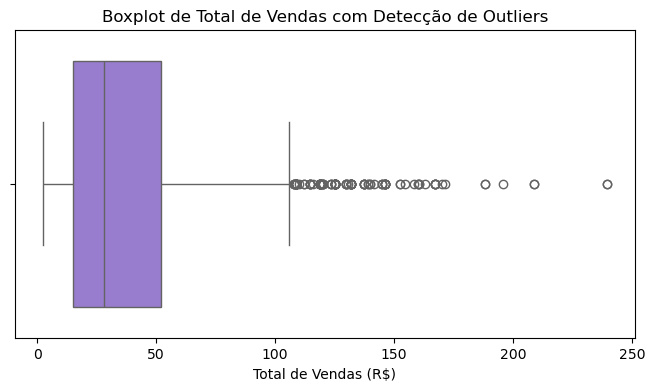

In [117]:

# Garante que a coluna est√° no formato num√©rico
df['Total de vendas'] = pd.to_numeric(df['Total de vendas'], errors='coerce')

# Remove valores nulos para an√°lise correta
dados = df['Total de vendas'].dropna()

# C√°lculo do IQR para detectar outliers
Q1 = dados.quantile(0.25)
Q3 = dados.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identifica√ß√£o dos outliers
outliers = dados[(dados < limite_inferior) | (dados > limite_superior)]

print(f"Limite inferior para outliers: {limite_inferior:.2f}")
print(f"Limite superior para outliers: {limite_superior:.2f}")
print(f"N√∫mero de outliers encontrados: {outliers.count()}")
print("Outliers:")
print(outliers)

# Visualiza√ß√£o com boxplot usando paleta personalizada
plt.figure(figsize=(8, 4))
sns.boxplot(x=dados, color="#9370DB")  # tom lil√°s
plt.title('Boxplot de Total de Vendas com Detec√ß√£o de Outliers')
plt.xlabel('Total de Vendas (R$)')
plt.show()



### Leitura de Outliers

| Linha                            | Valor / Exemplo         | Explica√ß√£o                                                                                                   |
| -------------------------------- | ----------------------- | ------------------------------------------------------------------------------------------------------------ |
| Limite inferior para outliers  | -40,66                  | Limite m√≠nimo calculado pelo m√©todo IQR. Nenhum valor real √© negativo, ent√£o *n√£o h√° outliers inferiores*. |
| Limite superior para outliers  | 107,78                  | Qualquer valor *acima disso √© considerado outlier* (acima da m√©dia esperada).                              |
| N√∫mero de outliers encontrados | 142                     | Total de registros que ultrapassam o limite superior de R\$ 107,78.                                          |
| Outliers: (ex: 44  ‚Üí 125.40) | √çndice 44 = 125,40      | O √≠ndice 44 da base de dados cont√©m um valor que √© outlier. Isso se repete para todos os demais listados.    |
| 57 ‚Üí 239.36                    | Valor m√°ximo encontrado | Este √© o *maior total de vendas* da base. Muito acima da m√©dia, por isso √© outlier.                        |
| 61 ‚Üí 152.32, 63 ‚Üí 108.80     | Outros exemplos reais   | Valores reais de produtos que venderam bem acima da maioria.                                                 |
| ...                            | (continua√ß√£o da lista)  | Indica que h√° muitos outros (at√© 142), mas s√≥ uma parte foi mostrada.                                        |
| Name: total de vendas          | dtype: float64          | O nome da coluna analisada e seu tipo de dado (float64 = n√∫mero decimal).                   ¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†|



O gr√°fico mostra como os valores das vendas est√£o distribu√≠dos por transa√ß√£o. Ele ajuda a entender onde est√£o a maioria dos dados e quais valores fogem do padr√£o.

- A maioria das vendas est√° abaixo de R$ 80,00, o que mostra que esse √© o valor mais comum.

- A mediana (linha do meio na caixa) est√° perto do in√≠cio do gr√°fico, indicando que a maior parte das vendas tem valores baixos.

- H√° v√°rios outliers acima de R$ 100,00, chegando perto de R$ 240,00. Isso mostra que existem vendas bem acima do valor normal.


### O que esses outliers podem representar?

Esses valores at√≠picos podem ser explicados por diferentes hip√≥teses:

1. **Compras de grande volume**: Um cliente pode ter comprado v√°rias unidades de um ou mais produtos em uma √∫nica transa√ß√£o.
2. **Produtos com alto ticket m√©dio**: Algumas categorias ou itens espec√≠ficos podem ter pre√ßo elevado, influenciando o valor final da venda.
3. **Promo√ß√µes ou combos especiais**: Pacotes promocionais com m√∫ltiplos produtos podem gerar vendas mais altas em determinados momentos.
4. **Vendas corporativas ou em atacado**: Empresas comprando em maior escala podem gerar essas transa√ß√µes fora do padr√£o normal de um consumidor comum.


## Interpreta√ß√£o do Gr√°fico de Boxplot - Quantidade Vendida por Venda

Ap√≥s identificarmos os outliers no conjunto de dados, seguimos para a an√°lise espec√≠fica da quantidade vendida em cada transa√ß√£o, focando nos valores at√≠picos e na dispers√£o das quantidades.

- A linha central da caixa representa a mediana da quantidade vendida, indicando o valor central da distribui√ß√£o.  
- A extens√£o da caixa corresponde ao intervalo interquartil (IQR), que abrange a varia√ß√£o entre o 25¬∫ e o 75¬∫ percentil.  
- Os ‚Äúbigodes‚Äù mostram a amplitude dos dados dentro de 1,5 vezes o IQR, englobando a maior parte das observa√ß√µes.  
- Pontos fora dessa faixa s√£o considerados outliers, sinalizando vendas incomuns, como pedidos muito grandes ou poss√≠veis erros de registro.

Essa visualiza√ß√£o √© fundamental para entender a concentra√ß√£o e variabilidade das quantidades vendidas, permitindo identificar padr√µes at√≠picos que possam impactar a an√°lise geral e orientar ajustes estrat√©gicos na opera√ß√£o comercial.

C:\Users\andre\AppData\Local\Temp\ipykernel_42448\3888899498.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


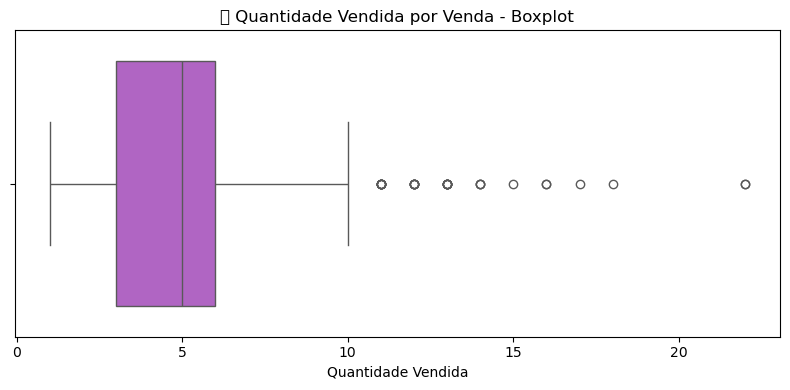

In [119]:

# Garantir que a coluna 'Quantidades' est√° num√©rica
df['Quantidades'] = pd.to_numeric(df['Quantidades'], errors='coerce')

# Remover valores nulos para an√°lise correta
dados = df['Quantidades'].dropna()

# Plot do boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=dados, color="#BA55D3")  # tom lil√°s/roxo
plt.title("üìä Quantidade Vendida por Venda - Boxplot")
plt.xlabel("Quantidade Vendida")
plt.tight_layout()
plt.show()



#### Vis√£o Geral

- *Mediana:* Representada pela linha interna da caixa, a mediana se encontra em aproximadamente *5 unidades vendidas por venda*. Isso significa que metade das vendas foi de at√© 5 unidades.

- *Quartis (Caixa):* A caixa roxa indica o intervalo entre o primeiro quartil (Q1) e o terceiro quartil (Q3), o que representa os *50% centrais dos dados. Nesse caso, a maioria das vendas est√° concentrada entre **cerca de 2 e 10 unidades*.

- *Bigodes:* As linhas que se estendem a partir da caixa indicam a *variabilidade fora da mediana, abrangendo as vendas ainda consideradas dentro da normalidade. Os bigodes alcan√ßam aproximadamente **0 a 13 unidades vendidas*.

- *Outliers:* Os pontos fora dos bigodes representam *valores at√≠picos, ou seja, vendas com quantidade significativamente superior √† maioria. No gr√°fico, observa-se a ocorr√™ncia de vendas com **mais de 15 unidades, chegando a **valores acima de 20 unidades por venda*.

#### Interpreta√ß√£o Anal√≠tica

A an√°lise do gr√°fico permite inferir que:

- A maior parte das transa√ß√µes corresponde a *pequenas quantidades de produtos, sugerindo que os consumidores realizam **compras de reposi√ß√£o frequente*, com perfil t√≠pico de consumo dom√©stico ou de proximidade.

- As *vendas com grandes quantidades* ocorrem com menor frequ√™ncia, sendo consideradas exce√ß√µes. Essas vendas at√≠picas podem estar associadas a *compras corporativas, **clientes que compram em atacado, **promo√ß√µes espec√≠ficas* ou *compras de produtos com alta rotatividade*.

- A distribui√ß√£o apresenta uma *assimetria √† direita, ou seja, h√° maior ocorr√™ncia de valores extremos com **altas quantidades vendidas*, o que refor√ßa a exist√™ncia de um grupo espec√≠fico de consumidores que adquirem volumes acima do padr√£o.

#### Considera√ß√µes Finais 

O boxplot analisado permite compreender o comportamento t√≠pico das vendas por transa√ß√£o no per√≠odo observado. A mediana e o intervalo interquartil indicam um padr√£o de vendas com *baixa quantidade por transa√ß√£o*, enquanto os outliers revelam a presen√ßa de um grupo de vendas com volumes elevados, que merecem aten√ß√£o estrat√©gica.

A an√°lise sugere que:

- O *estoque e o abastecimento* devem priorizar produtos de giro r√°pido e baixo volume por venda;
- Estrat√©gias de marketing podem ser elaboradas para *incentivar o aumento do ticket m√©dio*, especialmente nas faixas de venda mais comuns;
- √â poss√≠vel identificar e atender um *segmento de clientes de alto volume*, por meio de a√ß√µes espec√≠ficas e¬†personalizadas.

## An√°lise dos Pre√ßos Unit√°rios dos Produtos

Ap√≥s explorarmos a base de dados com foco em categorias, outliers e correla√ß√µes, avan√ßamos agora para uma an√°lise direcionada aos pre√ßos unit√°rios dos produtos.

Essa etapa busca compreender quais itens possuem os valores mais elevados por unidade, o que pode indicar produtos de maior valor agregado, estrat√©gias espec√≠ficas de precifica√ß√£o ou poss√≠veis distor√ß√µes nos registros.

A seguir, apresentamos uma lista dos produtos com os maiores pre√ßos unit√°rios, seguida de um gr√°fico de dispers√£o que facilita a visualiza√ß√£o dessas varia√ß√µes.

In [121]:

print(df[['Produtos', 'Pre√ßo unit√°rio']]
      .sort_values(by='Pre√ßo unit√°rio', ascending=False)
      .head(15)
      .to_string(index=False))




      Produtos  Pre√ßo unit√°rio
limpa aluminio           26.44
limpa aluminio           26.44
limpa aluminio           26.44
limpa aluminio           26.44
limpa aluminio           26.44
        azeite           23.30
        azeite           23.30
        azeite           23.30
 condicionador           22.90
 condicionador           22.90
 condicionador           22.90
 condicionador           22.90
 condicionador           22.90
 condicionador           22.90
 condicionador           22.90


### Tabela de Pre√ßos Unit√°rios por Produto

Esta an√°lise apresenta uma tabela com produtos e seus respectivos pre√ßos unit√°rios. A distribui√ß√£o mostra m√∫ltiplas ocorr√™ncias dos mesmos produtos, sugerindo que os dados podem ter sido extra√≠dos de pedidos individuais ou movimenta√ß√µes distintas no sistema.

#### Vis√£o Geral
A tabela cont√©m tr√™s colunas: um identificador num√©rico (possivelmente de pedido ou item), o nome do produto e o seu respectivo *pre√ßo unit√°rio*. Foram identificados tr√™s produtos com diferentes frequ√™ncias de repeti√ß√£o.



#### Produtos analisados e padr√µes identificados:

- *Limpa alum√≠nio*
  - Aparece 5 vezes, com pre√ßo fixo de R$ 26,44.
  - Consist√™ncia de pre√ßo pode indicar produto padronizado com pouca varia√ß√£o entre lotes.

- *Azeite*
  - Aparece 3 vezes, com pre√ßo unit√°rio constante de R$ 23,30.
  - Menor frequ√™ncia de ocorr√™ncia pode sugerir menor demanda ou estoque mais limitado.

- *Condicionador*
  - Aparece 7 vezes, sempre com o mesmo valor de R$ 22,90.
  - Alta recorr√™ncia, apesar de ser o de menor pre√ßo do grupo, pode sugerir maior rotatividade ou ampla variedade de marcas sob o mesmo nome comercial.



C:\Users\andre\AppData\Local\Temp\ipykernel_42448\3236928444.py:8: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


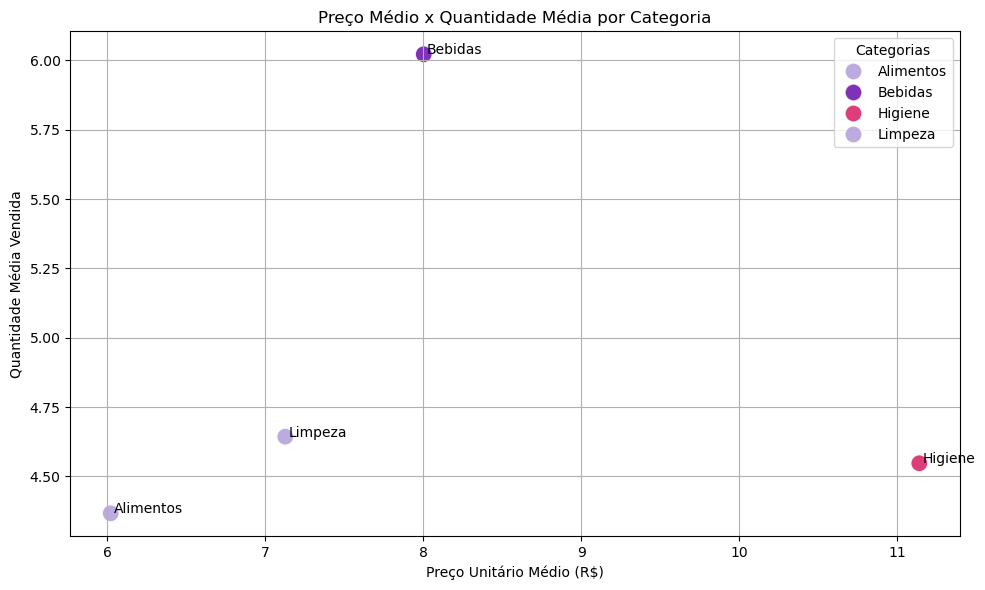

In [125]:

# Paleta lil√°s, roxo e rosa com maior contraste
paleta_lilas_ajustada = sns.color_palette(["#B19CD9", "#6A0DAD", "#D81B60"])

# Agrupar por categoria e calcular a m√©dia de pre√ßo e quantidade vendida
agrupado = df.groupby("Categorias")[["Pre√ßo unit√°rio", "Quantidades"]].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=agrupado,
    x="Pre√ßo unit√°rio",
    y="Quantidades",
    hue="Categorias",
    palette=paleta_lilas_ajustada,
    s=150,
    alpha=0.85
)

# Adicionar os nomes das categorias ao lado dos pontos
for i in range(agrupado.shape[0]):
    plt.text(
        agrupado["Pre√ßo unit√°rio"][i] + 0.02,
        agrupado["Quantidades"][i],
        agrupado["Categorias"][i],
        fontsize=10
    )

plt.title("Pre√ßo M√©dio x Quantidade M√©dia por Categoria")
plt.xlabel("Pre√ßo Unit√°rio M√©dio (R$)")
plt.ylabel("Quantidade M√©dia Vendida")
plt.grid(True)
plt.tight_layout()
plt.show()


### Pre√ßo M√©dio vs. Quantidade M√©dia Vendida por Categoria

O gr√°fico exibe a rela√ß√£o entre o *pre√ßo m√©dio unit√°rio (R$)* e a *quantidade m√©dia vendida* para quatro categorias de produtos: Alimentos, Bebidas, Higiene e Limpeza. √â uma an√°lise de dispers√£o que permite entender como o comportamento de pre√ßo se relaciona com o volume m√©dio de vendas por tipo de produto.

#### Vis√£o Geral

- *Eixo X:* Pre√ßo Unit√°rio M√©dio, variando aproximadamente de R$ 7,00 a R$ 11,00.
- *Eixo Y:* Quantidade M√©dia Vendida, variando de 4,0 a 6,0 unidades.
- Cada ponto representa uma categoria espec√≠fica, colorida de acordo com a legenda.

### Principais Observa√ß√µes

1. *Bebidas:*
   - Apresenta a *maior quantidade m√©dia vendida*, por volta de 6,00 unidades.
   - Possui pre√ßo m√©dio intermedi√°rio (cerca de R$ 7,50), o que sugere alta rotatividade com pre√ßos acess√≠veis.

2. *Higiene:*
   - Det√©m o *maior pre√ßo m√©dio unit√°rio*, em torno de R$ 10,00.
   - Est√° associada √† menor m√©dia de vendas (pr√≥xima de 4,00), indicando produtos de maior valor com menor frequ√™ncia de compra.

3. *Alimentos e Limpeza:*
   - Ambas t√™m pre√ßos m√©dios semelhantes (entre R$ 7,00 e R$ 7,50).
   - Quantidade m√©dia vendida varia entre 4,5 e 5,0 unidades, refletindo equil√≠brio entre pre√ßo e volume.

### Interpreta√ß√µes Poss√≠veis

- *Produtos de maior valor, como os de Higiene*, tendem a ser comprados em menor quantidade, mas podem ter maior impacto no faturamento por unidade.
- *Itens com pre√ßos m√©dios menores, como Bebidas*, podem compensar o baixo pre√ßo com volume elevado, sendo estrat√©gicos para aumento de receita em escala.
- A an√°lise ajuda a orientar decis√µes como foco promocional, reposicionamento de pre√ßo ou desenvolvimento de categorias com maior potencial de venda por volume¬†ou¬†valor.

## S√≠ntese dos Resultados
Ap√≥s uma an√°lise detalhada dos dados apresentados, destacamos os principais insights e considera√ß√µes finais que podem orientar decis√µes futuras.

Apresentamos visualmente a quantidade de vendas e a receita gerada por produto e categoria. Identificamos poss√≠veis hip√≥teses sobre os fatores que influenciam as vendas ou a aus√™ncia delas, destacando quais categorias e produtos apresentam maior ou menor volume de vendas.

Exploramos tamb√©m a sazonalidade, avaliando como o tempo ‚Äî especialmente em datas espec√≠ficas como feriados e o final do ano ‚Äî impacta as vendas. Isso nos permitiu verificar as rela√ß√µes entre quantidade vendida, pre√ßo e receita ao longo dos diferentes per√≠odos.

Aplicamos an√°lises univariadas e bivariadas, utilizando gr√°ficos como heatmaps, boxplots, gr√°ficos de barras e de pizza, para identificar padr√µes, detectar outliers e compreender melhor o comportamento dos pre√ßos, das vendas e das categorias.

Adicionalmente, destacamos produtos com pre√ßos mais elevados e padr√µes fora do comum, gerando insights importantes para otimizar o controle de estoque e aprimorar a gest√£o da sa√≠da de produtos.

Essas informa√ß√µes fornecem uma base s√≥lida para a tomada de decis√µes estrat√©gicas e eficientes, contribuindo para o aprimoramento das opera√ß√µes comerciais e a maximiza√ß√£o dos resultados.